In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
df = pd.read_csv('euro-daily-hist_1999_2022.csv')
df

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-01-27,1.5289,1.9558,5.5104,1.4479,1.0017,7.3690,NaN,23.826,7.4378,...,4.8965,NaN,11.2108,1.4277,NaN,NaN,35.7020,20.4365,1.0865,18.7185
1,2023-01-26,1.5308,1.9558,5.5572,1.4568,1.0002,7.3893,NaN,23.818,7.4383,...,4.8818,NaN,11.1763,1.4292,NaN,NaN,35.6870,20.4961,1.0895,18.6127
2,2023-01-25,1.5360,1.9558,5.5690,1.4544,1.0020,7.3778,NaN,23.808,7.4381,...,4.9035,NaN,11.1335,1.4307,NaN,NaN,35.7180,20.4658,1.0878,18.6745
3,2023-01-24,1.5470,1.9558,5.6164,1.4517,1.0053,7.3642,NaN,23.874,7.4399,...,4.9171,NaN,11.0995,1.4337,NaN,NaN,35.6090,20.4234,1.0858,18.7687
4,2023-01-23,1.5529,1.9558,5.6372,1.4523,1.0013,7.3730,NaN,23.881,7.4393,...,4.9202,NaN,11.1183,1.4328,NaN,NaN,35.6300,20.4478,1.0871,18.6597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6224,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6225,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6226,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6227,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [22]:
df = df.iloc[:,[0,1,4,-2]]
df.columns = ['Date','Australian dollar','Canadian dollar','US dollar']
df

,Date,Australian dollar,Canadian dollar,US dollar
0,2023-01-27,1.5289,1.4479,1.0865
1,2023-01-26,1.5308,1.4568,1.0895
2,2023-01-25,1.5360,1.4544,1.0878
3,2023-01-24,1.5470,1.4517,1.0858
4,2023-01-23,1.5529,1.4523,1.0871
...,...,...,...,...
6224,1999-01-08,1.8406,1.7643,1.1659
6225,1999-01-07,1.8474,1.7602,1.1632
6226,1999-01-06,1.8820,1.7711,1.1743
6227,1999-01-05,1.8944,1.7965,1.1790


In [23]:
df = pd.melt(df, id_vars='Date', value_vars=['Australian dollar', 'Canadian dollar', 'US dollar'], value_name='Euro rate', var_name='Currency')
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date']>='2022-12-01'].reset_index(drop=True)
df['Euro rate'] = pd.to_numeric(df['Euro rate'])
print(f'Currencies: {df.Currency.unique()}\n')
print(df)

Currencies: ['Australian dollar' 'Canadian dollar' 'US dollar']

          Date           Currency  Euro rate
0   2023-01-27  Australian dollar     1.5289
1   2023-01-26  Australian dollar     1.5308
2   2023-01-25  Australian dollar     1.5360
3   2023-01-24  Australian dollar     1.5470
4   2023-01-23  Australian dollar     1.5529
..         ...                ...        ...
118 2022-12-07          US dollar     1.0529
119 2022-12-06          US dollar     1.0516
120 2022-12-05          US dollar     1.0587
121 2022-12-02          US dollar     1.0538
122 2022-12-01          US dollar     1.0454

[123 rows x 3 columns]


<Axes: xlabel='Date', ylabel='Euro rate'>

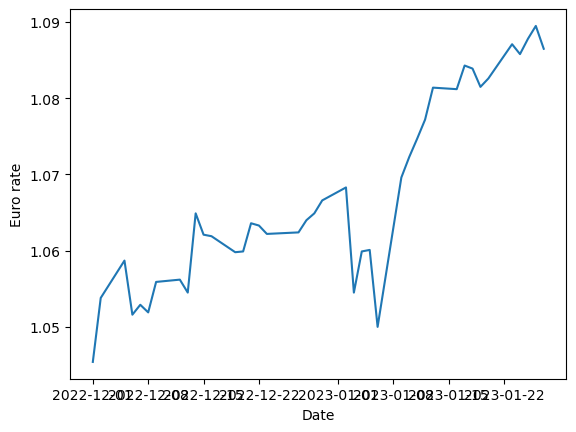

In [25]:
usd = df[df['Currency']=='US dollar'].reset_index(drop=True)
sns.lineplot(x='Date', y='Euro rate', data=usd)

<Axes: xlabel='Date', ylabel='Euro rate'>

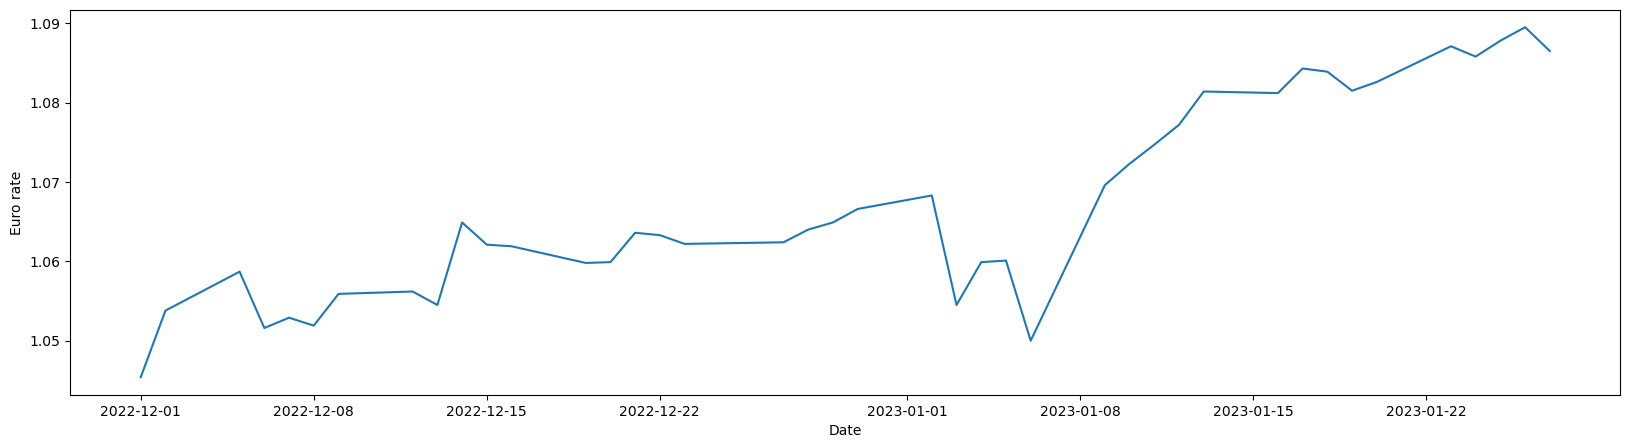

In [31]:
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='Date', y='Euro rate', data=usd)

In [ ]:
fig = plt.subplots(figsize=(20, 5),)
sns.lineplot(x='Date', y='Euro rate', data=usd)

In [32]:
df

,Date,Currency,Euro rate
0,2023-01-27,Australian dollar,1.5289
1,2023-01-26,Australian dollar,1.5308
2,2023-01-25,Australian dollar,1.5360
3,2023-01-24,Australian dollar,1.5470
4,2023-01-23,Australian dollar,1.5529
...,...,...,...
118,2022-12-07,US dollar,1.0529
119,2022-12-06,US dollar,1.0516
120,2022-12-05,US dollar,1.0587
121,2022-12-02,US dollar,1.0538


In [33]:
usd = df[df['Currency']=='US dollar'].reset_index(drop=True)
aud = df[df['Currency']=='Australian dollar'].reset_index(drop=True)
cad = df[df['Currency']=='Canadian dollar'].reset_index(drop=True)

<Axes: xlabel='Date', ylabel='Euro rate'>

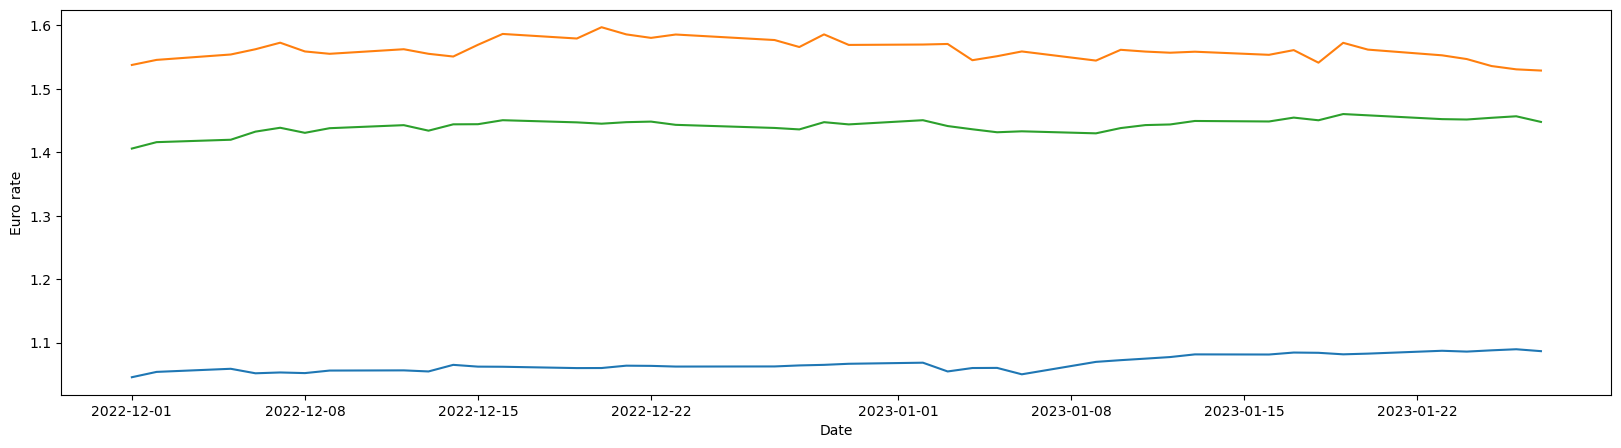

In [34]:
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='Date', y='Euro rate', data=usd)
sns.lineplot(x='Date', y='Euro rate', data=aud)
sns.lineplot(x='Date', y='Euro rate', data=cad)

<Axes: xlabel='Date', ylabel='Euro rate'>

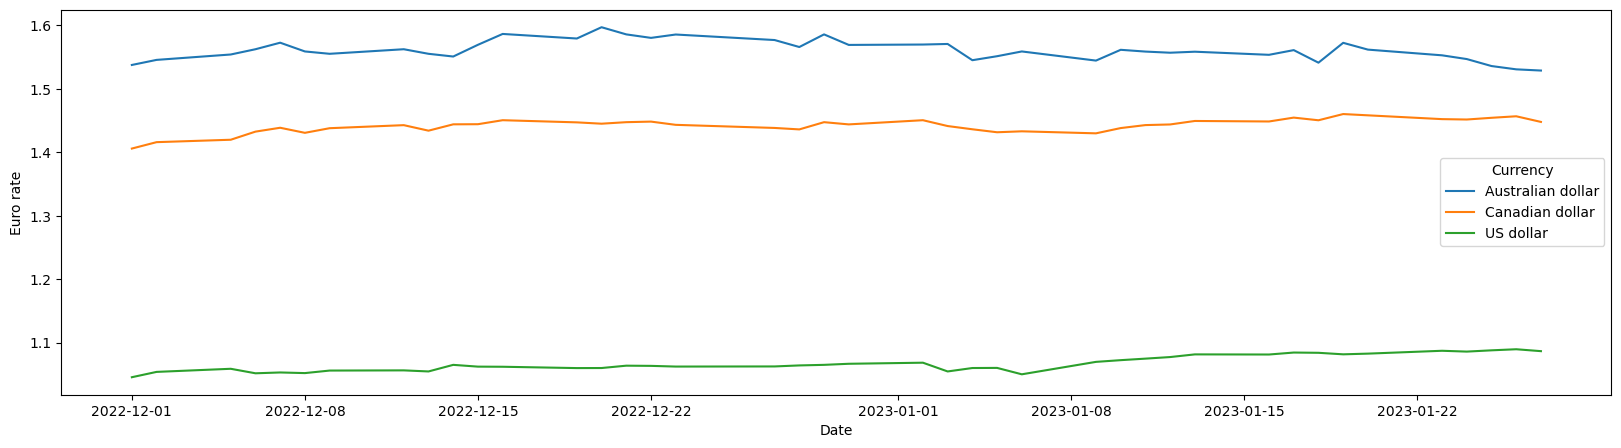

In [39]:
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='Date',y='Euro rate',data=df, hue='Currency')